In [77]:
from rruffDataProcess import *

df=loadDataFrame()
# df.drop_duplicates(inplace=True)


In [78]:
df.iloc[10]

##NAMES                                                          Corundum
##RRUFFID                                                         R060020
##IDEAL CHEMISTRY                                               Al_2_O_3_
##LOCALITY                                       Yogo Gulch, Montana, USA
##OWNER                                                             RRUFF
##SOURCE                               American Museum of Natural History
##DESCRIPTION                           Water rounded light blue fragment
##STATUS                The identification of this mineral has been co...
##URL                                                  rruff.info/R060020
##MEASURED CHEMISTRY    (Al_1.99_Fe^3+^_0.01_)_Σ=2_O_3_ ; Fe^3+^ by ch...
##PIN_ID                                                           L01955
##ORIENTATION           Laser parallel to c* (0 0 1). Fiducial mark pe...
Spectra                 <ramanspy.core.Spectrum object at 0x000001A2D1...
Name: 10, dtype: object

<Axes: title={'center': 'Raman spectra'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

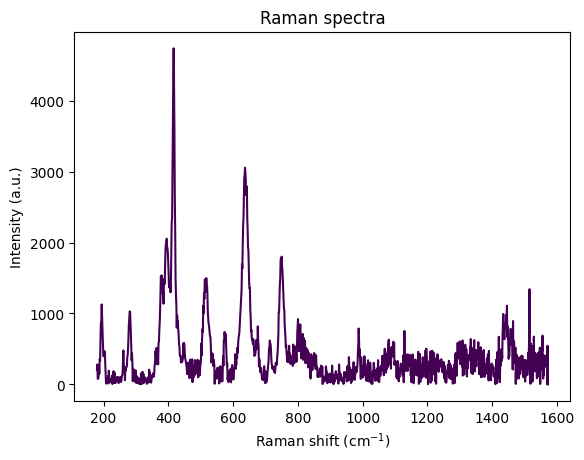

In [79]:
spectrum=df['Spectra'].iloc[10]
spectrum.plot()

<Axes: title={'center': 'Raman spectra'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

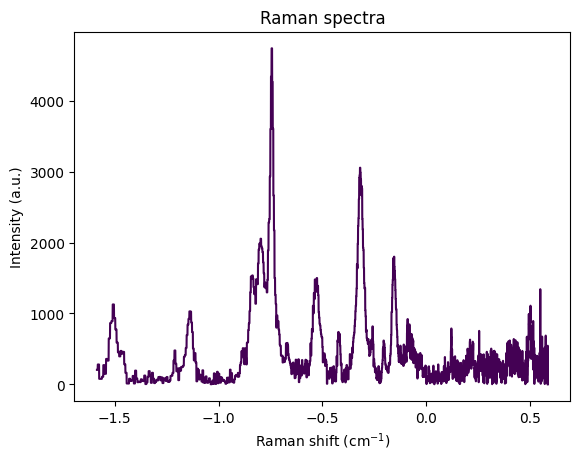

In [80]:
spectrum=ReSamplingSpectrum(spectrum,30000)
getLogSpectrum(spectrum).plot()

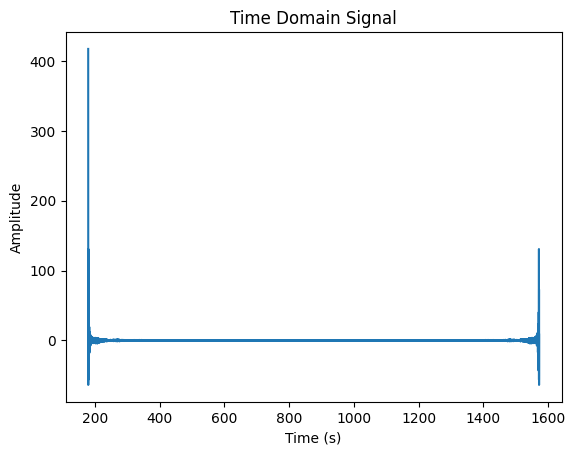

In [81]:
time = spectrum.spectral_axis
time_domain_signal = np.fft.ifft(vectorisedBand(spectrum)(time))
import matplotlib.pyplot as plt



# plt.plot(time, np.real(time_domain_signal))
plt.plot(time, np.real(time_domain_signal))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.show()

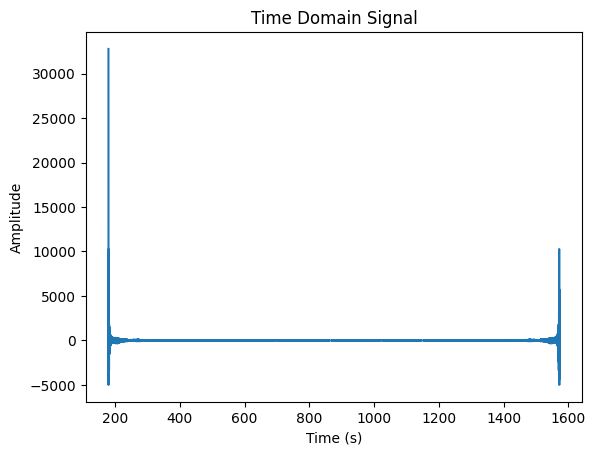

In [82]:
import numpy as np
import wave

# 设置参数
sample_rate = 44100  # 采样率
duration = 2  # 持续时间（秒）


# 将信号归一化到[-1, 1]范围
time_domain_signal = np.real(time_domain_signal) / np.max(np.abs(time_domain_signal))

# 将信号转换为16位整数
time_domain_signal = (time_domain_signal * 32767).astype(np.int16)
plt.plot(time, np.real(time_domain_signal))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.show()

In [83]:
import numpy as np
from scipy.io.wavfile import write

# 设置采样率和时长
sample_rate = 44100  # 采样率

# 生成一个简单的正弦波信号
t = np.linspace(0, duration, len(time_domain_signal), endpoint=False)

# 将信号转换为16位整数格式
signal_int16 = np.int16(time_domain_signal * 32767)

# 写入.wav文件
write("output.wav", sample_rate, signal_int16)